## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

#### Importing all required libraries

In [2]:
import pandas as pd , numpy as np , seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve

#### Importing all datasets- we have 3 datasets

In [3]:
churn_df = pd.read_csv("C:/Users/ADMIN/Documents/IIMK-UpGrad/Logistic Regression Case Study - Python/churn_data.csv")
churn_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cust_df = pd.read_csv("C:/Users/ADMIN/Documents/IIMK-UpGrad/Logistic Regression Case Study - Python/customer_data.csv")
cust_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
inter_df = pd.read_csv("C:/Users/ADMIN/Documents/IIMK-UpGrad/Logistic Regression Case Study - Python/internet_data.csv")
inter_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe
For this we use `merge` function from `pandas` library

`SYNTAX` : pd.merge(*dataframe1* , *dataframe2* , how = *type of join* , on = *common variable for join*)

In [6]:
df1 = pd.merge(churn_df, cust_df , how='inner' , on='customerID')
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [7]:
# Final dataframe with all predictor variables

telecom = pd.merge(df1, inter_df, how ='inner' , on = 'customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


### Step 2: Inspecting the Dataframe

In [8]:
# Let's check the dimensions of the dataframe

telecom.shape

(7043, 21)

In [9]:
# let's look at the statistical aspects of the dataframe

telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
# Let's see the type of each column

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

**Converting some binary variables (Yes/No) to 0/1**

In [11]:
# 2 methods of mapping binary categorical variables to 0 and 1:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']


# Method 1:

#def binary_val(x):
#    return x.map({'Yes':1 , 'No':0})

#telecom[varlist] = telecom[varlist].apply(binary_val)


# Method 2:

telecom[varlist] = telecom[varlist].apply(lambda x: x.map({'Yes':1 , 'No':0}))

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple categories, create dummy features (one-hot encoding)

In [13]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
# ['Contract', 'PaymentMethod', 'gender', 'InternetService']

dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

In [14]:
# Adding the results to the master dataframe

telecom = pd.concat([telecom, dummy1], axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


**Creating dummy variables for the remaining categorical variables and dropping the level with big names:**

In [15]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix= 'MultipleLines')
ml.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [16]:
# Dropping MultipleLines_No phone service column
v1 = ml.drop(['MultipleLines_No phone service'], 1)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, v1], axis=1)

In [17]:
# Creating dummy variables for the variable 'OnlineSecurity'
os = pd.get_dummies(telecom['OnlineSecurity'], prefix= 'OnlineSecurity')
# Dropping OnlineSecurity_No internet service column
v2 = os.drop(['OnlineSecurity_No internet service'], 1)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, v2], axis=1)

In [18]:
# Creating dummy variables for the variable 'OnlineBackup'
ob = pd.get_dummies(telecom['OnlineBackup'], prefix= 'OnlineBackup')
# Dropping OnlineBackup_No internet service column
v3 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom, v3], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'
dp = pd.get_dummies(telecom['DeviceProtection'], prefix= 'DeviceProtection')
# Dropping DeviceProtection_No internet service column
v4 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom, v4], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
v5 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,v5], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
v6 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,v6], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
v7 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,v7], axis=1)

In [19]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


**Dropping the repeated variables**

In [20]:
# We have created dummies for the below variables, so we can drop them

telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [21]:
#The varaible TotalCharges was imported as a string we need to convert it to float

telecom['TotalCharges'] =  pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [22]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

***Now we observe that we got all variables to be numeric(or continuous)***

#### Checking for Outliers:

In [23]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [24]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [25]:
# Adding up the missing values (column-wise)

telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

**It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis**

In [26]:
# Checking the percentage of missing values

round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [27]:
# Removing NaN TotalCharges rows

telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [28]:
# Checking percentage of missing values after removing the missing values

round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now, we do not have any missing values

### Step 4: Test-Train Split

In [29]:
# Putting feature variable to X and y

X = telecom.drop(['Churn', 'customerID'], axis=1)
y = telecom['Churn']

In [30]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [31]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

For this we use Standardisation method, unlike in MLR we used Normalization.

In [33]:
# First object initialization

scaler = StandardScaler()

In [34]:
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [35]:
### Checking the Churn Rate

churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

#### Therefore, we have apprx. 27% churn rate

### Step 6: Looking at Correlations

In [36]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline    
#------------> this tells Python to draw plots immediately after current cell

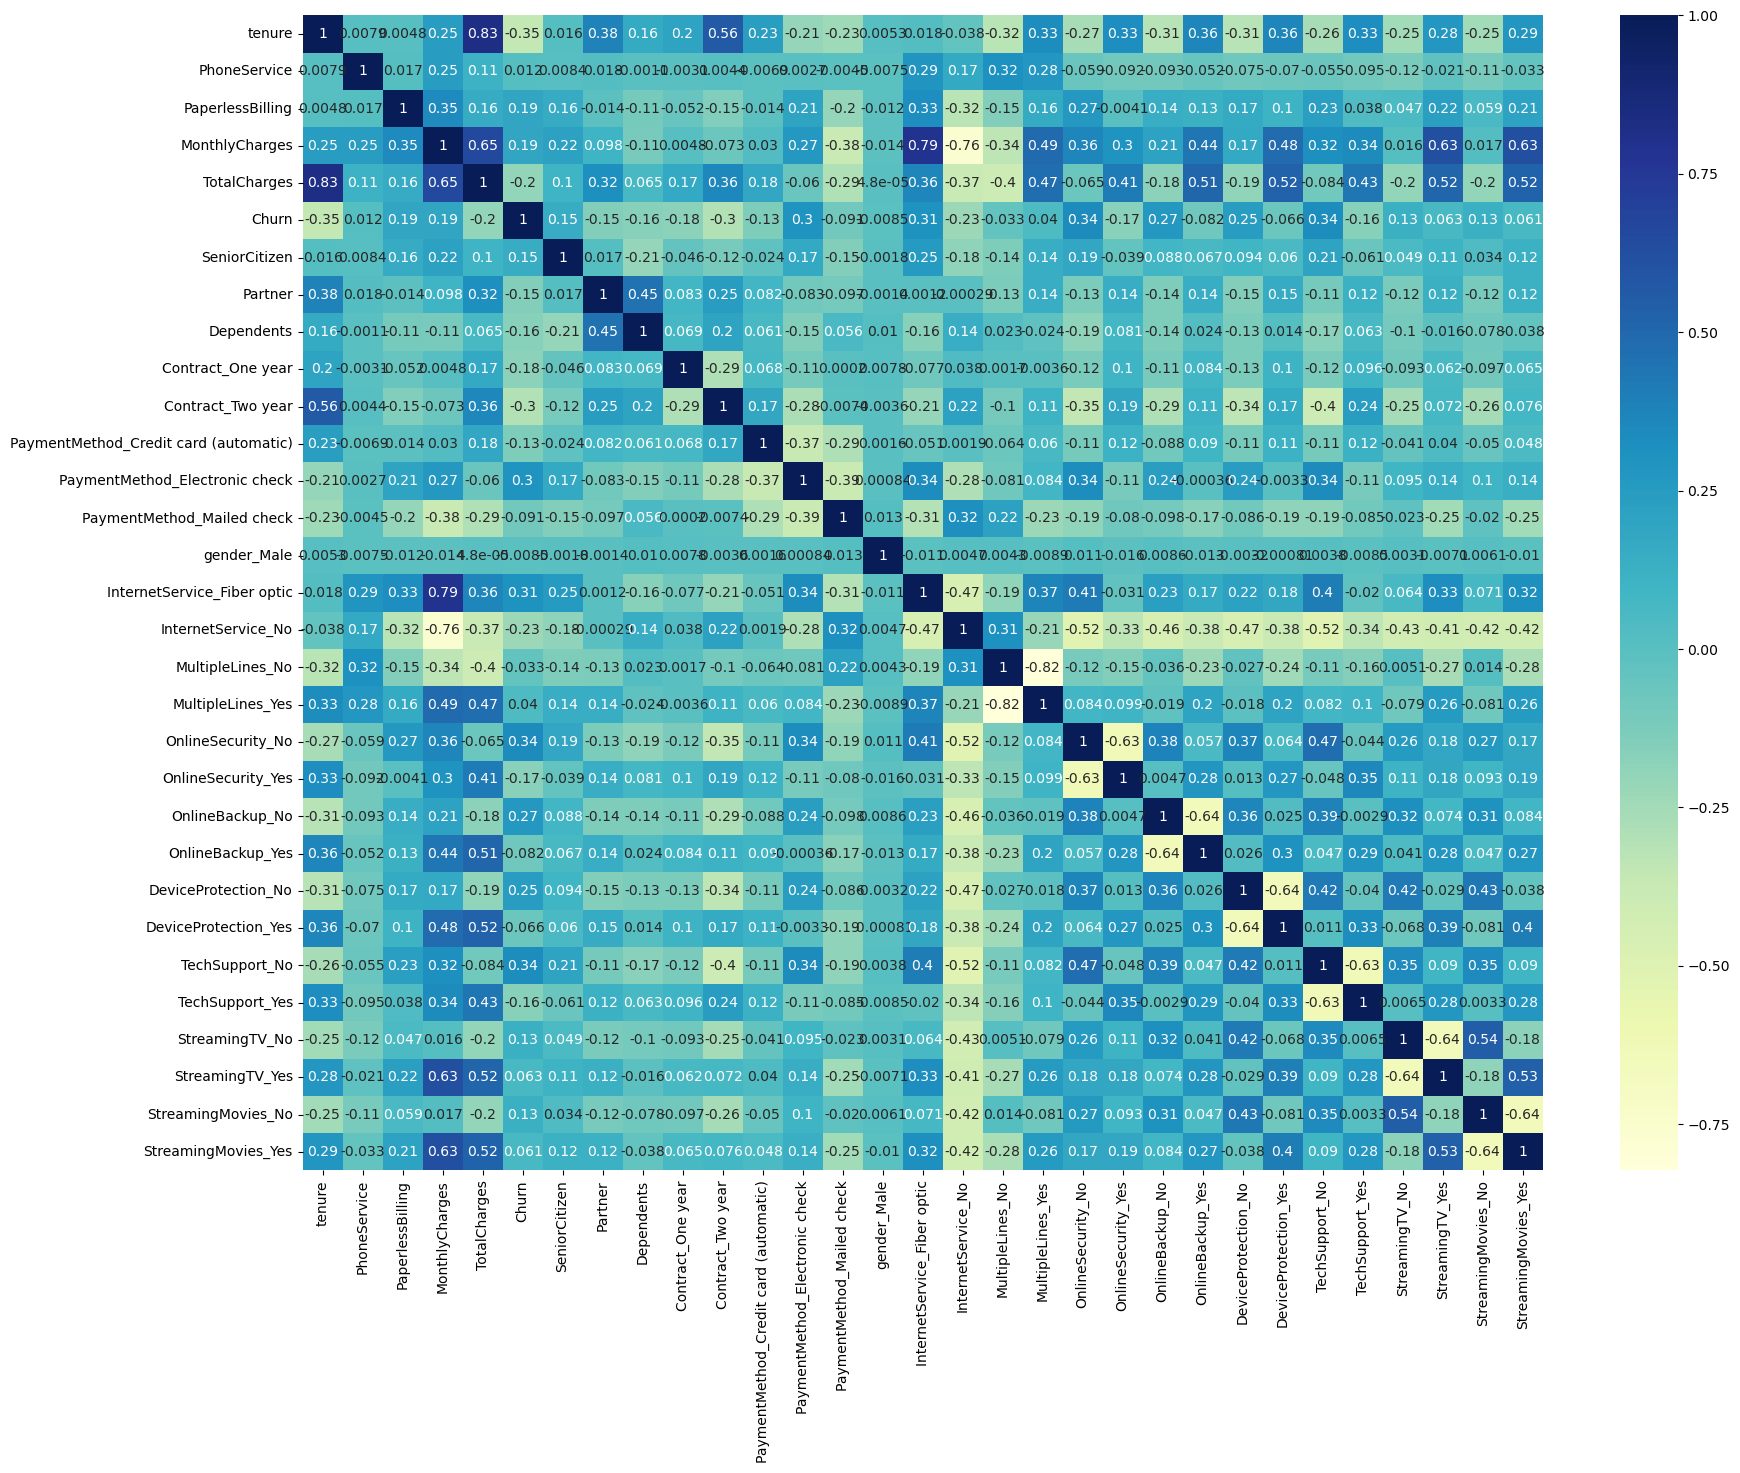

In [37]:
plt.figure(figsize= (20,15))
sns.heatmap(telecom.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Dropping highly correlated dummy variables

In [38]:
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)

X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)

#### Checking the Correlation Matrix
After dropping highly correlated variables now let's check the correlation matrix again.

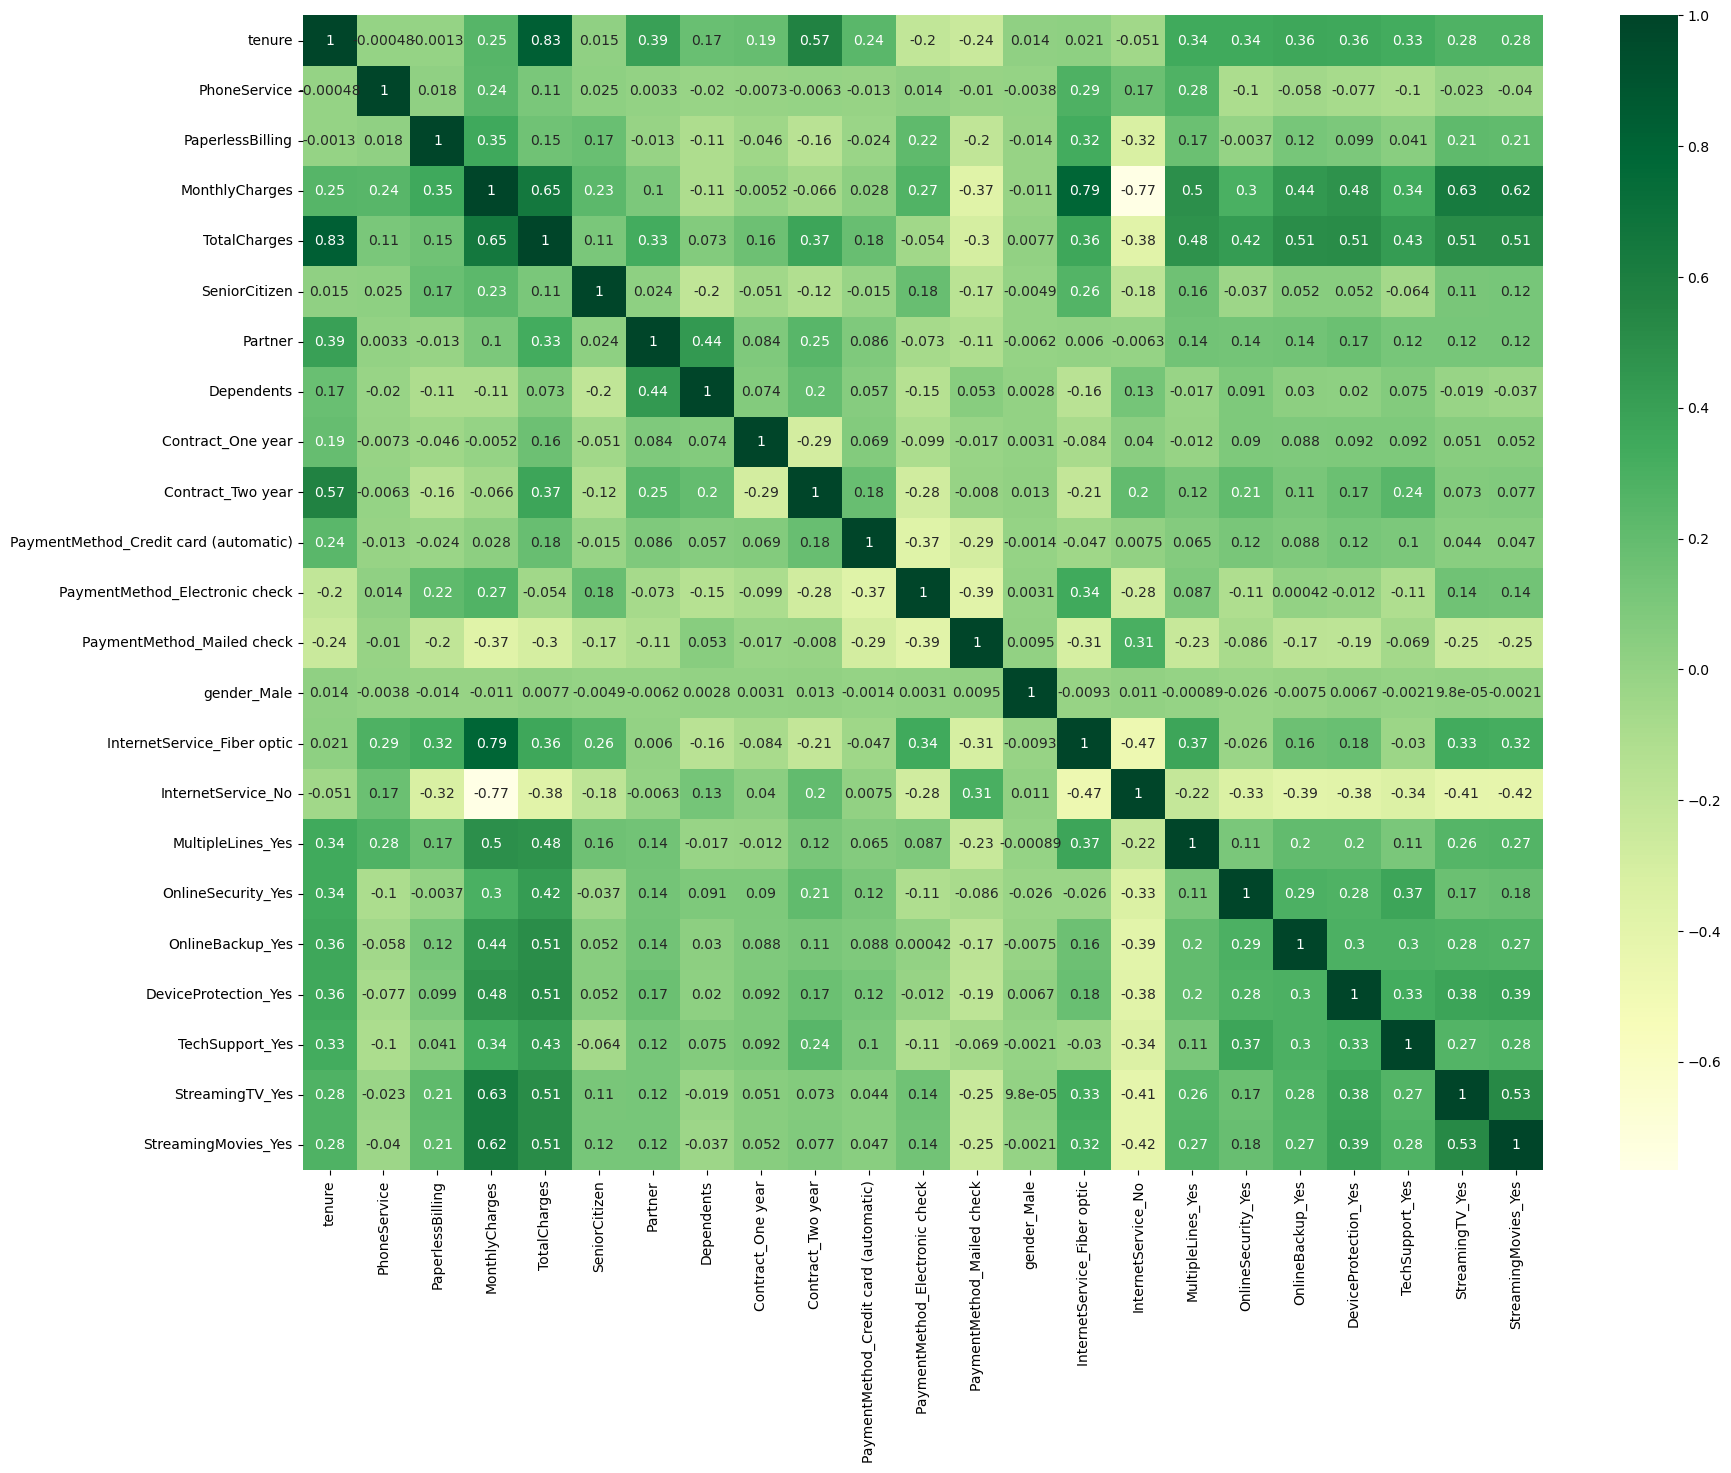

In [39]:
plt.figure(figsize= (20,15))
sns.heatmap(X_train.corr(), annot=True, cmap="YlGn")
plt.show()

### Step 7: Model Building

#### Running Your First Training Model

In [41]:
import statsmodels.api as sm
# First adding a constant
x_const = sm.add_constant(X_train)

# Fitting the LoR model
logr1 = sm.GLM(y_train, x_const, family = sm.families.Binomial())
logr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 31 Jul 2023   Deviance:                       4009.4
Time:                        18:51:45   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 

In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             
# running RFE with 15 variables as output but it is showing an error, hence changed syntax from rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train) 

In [55]:
rfe.support_

array([ True, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True])

**Here, with RFE we got 11 features selected. Let's find out the exculded features**

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 7),
 ('PaperlessBilling', False, 4),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 10),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 12),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 6),
 ('OnlineBackup_Yes', False, 9),
 ('DeviceProtection_Yes', False, 13),
 ('TechSupport_Yes', False, 5),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [57]:
col = X_train.columns[rfe.support_]

In [58]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [76]:
const2 = sm.add_constant(X_train[col])
logr2 = sm.GLM(y_train, const2, family= sm.families.Binomial()) 
res = logr2.fit()
res.summary() #-----------> we need to assign to a new object res

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.3
Date:                Mon, 31 Jul 2023   Deviance:                       4102.7
Time:                        19:57:30   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2707
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7295      0.105    -16.454      0.000      -1.935      -1.523
tenure                         -1.1578      0.175     -6.622      0.000      -1.501      -0.815
TotalCharges                    0.2282      0.181      1.257      0.209      -0.127       0.584
SeniorCitizen                   0.5399      0.098      5.500      0.000       0.347       0.732
Contract_One year              -0.8448      0.125     -6.741      0.000      -1.090      -0.599
Contract_Two year              -1.5718      0.206     -7.628      0.000      -1.976      -1.168
InternetService_Fiber optic     0.9129      0.104      8.803      0.000       0.710       1.116
InternetService_No             -0.9741      0.150     -6.504      0.000      -1.268      -0.681
MultipleLines_Yes               0.2098      0.093      2.265      0.024       0.028       0.391
StreamingTV_Yes                 0.3257      0.095      3.430      0.001       0.140       0.512
StreamingMovies_Yes             0.2276      0.094      2.409      0.016       0.042       0.413
===============================================================================================
"""

In [77]:
# Getting the predicted values on the train set
y_train_pred = res.predict(const2)
y_train_pred[:10]

879     0.167204
5790    0.174289
6498    0.610739
880     0.662638
2784    0.709610
3874    0.308321
5387    0.354202
6623    0.768438
4465    0.116433
5364    0.558943
dtype: float64

In [78]:
y_train_pred = y_train_pred.values.reshape(-1)     #-------> reason of reshaping to list is to be added to a Dataframe
y_train_pred[:10]

array([0.16720396, 0.17428949, 0.61073896, 0.66263764, 0.70960979,
       0.30832111, 0.35420237, 0.76843759, 0.11643261, 0.55894329])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [79]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.167204,879
1,0,0.174289,5790
2,1,0.610739,6498
3,1,0.662638,880
4,1,0.709610,2784


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [80]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.167204,879,0
1,0,0.174289,5790,0
2,1,0.610739,6498,1
3,1,0.662638,880,1
4,1,0.709610,2784,1


In [81]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3272  363]
 [ 614  673]]


In [70]:
# Predicted     not_churn    churn
# Actual
# not_churn        3275      360
# churn            574       713  

In [82]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8015034538805363


#### Checking VIFs

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,MonthlyCharges,12.77
2,TotalCharges,10.09
0,tenure,6.77
7,InternetService_No,4.88
6,InternetService_Fiber optic,4.42
5,Contract_Two year,2.63
9,StreamingTV_Yes,2.61
10,StreamingMovies_Yes,2.61
8,MultipleLines_Yes,2.25
4,Contract_One year,1.66


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'MonthlyCharges' has the highest VIF. So let's start by dropping that.

In [74]:
col = col.drop('MonthlyCharges', 1)
col

Index(['tenure', 'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [83]:
# Let's re-run the model using the selected variables
const3 = sm.add_constant(X_train[col])
logr3 = sm.GLM(y_train, const3, family = sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.3
Date:                Mon, 31 Jul 2023   Deviance:                       4102.7
Time:                        20:14:06   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2707
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7295      0.105    -16.454      0.000      -1.935      -1.523
tenure                         -1.1578      0.175     -6.622      0.000      -1.501      -0.815
TotalCharges                    0.2282      0.181      1.257      0.209      -0.127       0.584
SeniorCitizen                   0.5399      0.098      5.500      0.000       0.347       0.732
Contract_One year              -0.8448      0.125     -6.741      0.000      -1.090      -0.599
Contract_Two year              -1.5718      0.206     -7.628      0.000      -1.976      -1.168
InternetService_Fiber optic     0.9129      0.104      8.803      0.000       0.710       1.116
InternetService_No             -0.9741      0.150     -6.504      0.000      -1.268      -0.681
MultipleLines_Yes               0.2098      0.093      2.265      0.024       0.028       0.391
StreamingTV_Yes                 0.3257      0.095      3.430      0.001       0.140       0.512
StreamingMovies_Yes             0.2276      0.094      2.409      0.016       0.042       0.413
===============================================================================================
"""

In [84]:
y_train_pred = res.predict(const3)

In [87]:
y_train_pred.values.reshape(-1)

array([0.16720396, 0.17428949, 0.61073896, ..., 0.08056687, 0.10675085,
       0.05266946])

In [88]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [89]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.385146,879,0
1,0,NaN,5790,0
2,1,0.375864,6498,1
3,1,0.038809,880,1
4,1,0.601122,2784,1


We see that the Churn_Prob value of less than 0.5 shows 1 which is incorrect, so we again create the column

In [90]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.385146,879,0
1,0,NaN,5790,0
2,1,0.375864,6498,0
3,1,0.038809,880,0
4,1,0.601122,2784,1


In [91]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.6631450629825274


We see that the accuracy has dropped a great deal.

**Let's check the VIFs again**

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalCharges,7.08
0,tenure,6.45
5,InternetService_Fiber optic,2.59
9,StreamingMovies_Yes,2.51
8,StreamingTV_Yes,2.50
4,Contract_Two year,2.47
7,MultipleLines_Yes,2.20
6,InternetService_No,2.14
3,Contract_One year,1.54
2,SeniorCitizen,1.29


In [93]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [94]:
# Let's re-run the model using the selected variables
const4 = sm.add_constant(X_train[col])
logr4 = sm.GLM(y_train,const4, family = sm.families.Binomial())
res = logr4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.1
Date:                Mon, 31 Jul 2023   Deviance:                       4104.3
Time:                        20:25:12   Pearson chi2:                 5.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2705
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7529      0.103    -17.022      0.000      -1.955      -1.551
tenure                         -0.9548      0.064    -14.950      0.000      -1.080      -0.830
SeniorCitizen                   0.5394      0.098      5.484      0.000       0.347       0.732
Contract_One year              -0.8386      0.125     -6.714      0.000      -1.083      -0.594
Contract_Two year              -1.5480      0.204     -7.572      0.000      -1.949      -1.147
InternetService_Fiber optic     0.9680      0.094     10.297      0.000       0.784       1.152
InternetService_No             -0.9813      0.149     -6.574      0.000      -1.274      -0.689
MultipleLines_Yes               0.2295      0.091      2.516      0.012       0.051       0.408
StreamingTV_Yes                 0.3527      0.093      3.812      0.000       0.171       0.534
StreamingMovies_Yes             0.2532      0.092      2.744      0.006       0.072       0.434
===============================================================================================
"""

In [95]:
y_train_pred = res.predict(const4)

In [96]:
y_train_pred.values.reshape(-1)

array([0.17622463, 0.19175912, 0.60902876, ..., 0.08354304, 0.10240392,
       0.05992103])

In [97]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [98]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.371748,879,0
1,0,NaN,5790,0
2,1,0.362694,6498,0
3,1,0.044029,880,0
4,1,0.599712,2784,1


In [99]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.6643640796424218


In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,StreamingMovies_Yes,2.45
7,StreamingTV_Yes,2.43
4,InternetService_Fiber optic,2.41
3,Contract_Two year,2.40
6,MultipleLines_Yes,2.18
0,tenure,1.72
5,InternetService_No,1.67
2,Contract_One year,1.53
1,SeniorCitizen,1.28


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3089,  546],
       [1106,  181]], dtype=int64)

In [103]:
# Actual/Predicted     not_churn    churn
        # not_churn        3278      357
        # churn            597       690  

In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6643640796424218

## Metrics beyond simply accuracy

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.14063714063714064

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.8497936726272353

In [108]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1502063273727648


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.24896836313617607


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7363528009535161


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [114]:
y_train_pred_final.isnull().sum()

Churn            0
Churn_Prob    1463
CustID           0
predicted        0
dtype: int64

In [115]:
y_train_pred_final = y_train_pred_final[~np.isnan(y_train_pred_final['Churn_Prob'])]

In [116]:
y_train_pred_final.isnull().sum()

Churn         0
Churn_Prob    0
CustID        0
predicted     0
dtype: int64

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

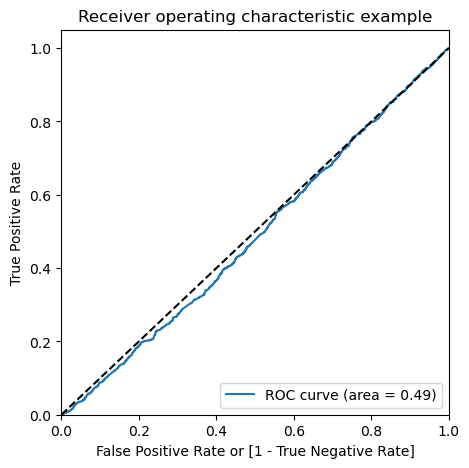

In [118]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.371748,879,0,1,1,1,1,0,0,0,0,0,0
2,1,0.362694,6498,0,1,1,1,1,0,0,0,0,0,0
3,1,0.044029,880,0,1,0,0,0,0,0,0,0,0,0
4,1,0.599712,2784,1,1,1,1,1,1,1,0,0,0,0
5,0,0.732203,3874,1,1,1,1,1,1,1,1,1,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.260191  1.000000  0.000000
0.1   0.1  0.434519  0.614444  0.371239
0.2   0.2  0.504192  0.450000  0.523251
0.3   0.3  0.537439  0.371111  0.595936
0.4   0.4  0.593813  0.265556  0.709261
0.5   0.5  0.634287  0.201111  0.786635
0.6   0.6  0.668112  0.121111  0.860492
0.7   0.7  0.706563  0.044444  0.939429
0.8   0.8  0.734027  0.005556  0.990231
0.9   0.9  0.739809  0.000000  1.000000


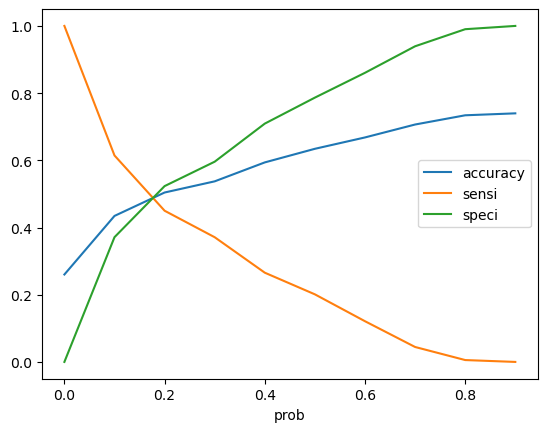

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.371748,879,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.362694,6498,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.044029,880,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.599712,2784,1,1,1,1,1,1,1,0,0,0,0,1
5,0,0.732203,3874,1,1,1,1,1,1,1,1,1,0,0,1


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.5041919629950853

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[1339, 1220],
       [ 495,  405]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.45

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.5232512700273544

In [128]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.47674872997264556


In [129]:
# Positive predictive value 
print (TP / float(TP+FP))

0.24923076923076923


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7300981461286805


## Precision and Recall

In [131]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[2013,  546],
       [ 719,  181]], dtype=int64)

##### Precision
TP / TP + FP

In [132]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.24896836313617607

##### Recall
TP / TP + FN

In [133]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.2011111111111111

**Using sklearn utilities for the same**

In [134]:
from sklearn.metrics import precision_score, recall_score

In [135]:
?precision_score            #------------> Help on method

In [136]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.24896836313617607

In [137]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.2011111111111111

### Precision and recall tradeoff

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 2       1
 3       1
 4       1
 5       0
        ..
 4914    0
 4915    0
 4917    0
 4919    0
 4921    0
 Name: Churn, Length: 3459, dtype: int64,
 0       0
 2       0
 3       0
 4       1
 5       1
        ..
 4914    0
 4915    0
 4917    0
 4919    0
 4921    0
 Name: predicted, Length: 3459, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

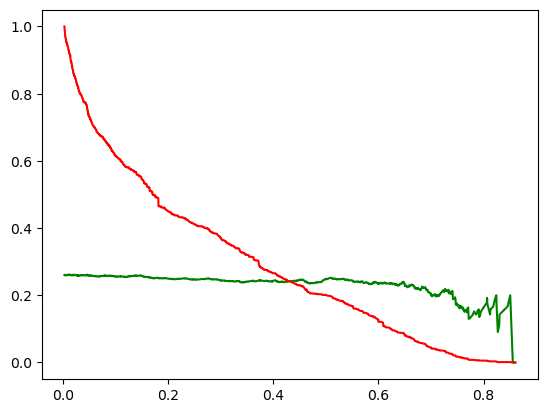

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [142]:
# Standardisation of numeric features

X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [143]:
X_test = X_test[col]
X_test.head()

,tenure,SeniorCitizen,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,0,0,0,1,0,0,0,1
3730,0.999203,0,0,0,1,0,1,1,1
1761,1.040015,0,0,1,0,1,1,0,0
2283,-1.286319,0,0,0,1,0,0,0,0
1872,0.346196,0,0,1,0,1,0,0,0


In [144]:
X_test_sm = sm.add_constant(X_test)

In [145]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [146]:
y_test_pred[:10]

942     0.450206
3730    0.288317
1761    0.006397
2283    0.609029
1872    0.009828
1970    0.636934
2532    0.308136
1616    0.006180
2485    0.541453
5914    0.188477
dtype: float64

In [148]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
942,0.450206
3730,0.288317
1761,0.006397
2283,0.609029
1872,0.009828


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [151]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.450206
1,1,3730,0.288317
2,0,1761,0.006397
3,1,2283,0.609029
4,0,1872,0.009828


In [154]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [155]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [156]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.450206
1,3730,1,0.288317
2,1761,0,0.006397
3,2283,1,0.609029
4,1872,0,0.009828


In [157]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [158]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.450206,1
1,3730,1,0.288317,0
2,1761,0,0.006397,0
3,2283,1,0.609029,1
4,1872,0,0.009828,0


In [159]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7758293838862559

In [160]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1292,  236],
       [ 237,  345]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5927835051546392

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.8455497382198953